<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
data['ZN'].unique()

array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное

================================================================

1. На нормальное распределение похожи частотные графики для 'RM' и 'MEDV'
3. На биномиальное распределение похож график 'RAD', 
4. На распределение Бернулли похож график 'CHAS'
6. На логнормальное распределение похож график 'LSTAT'


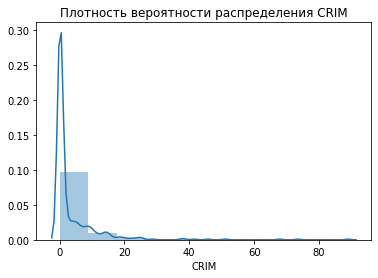

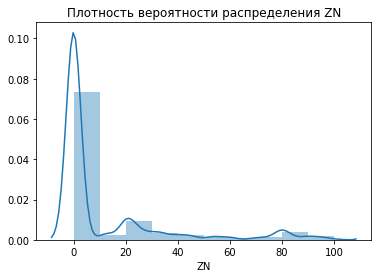

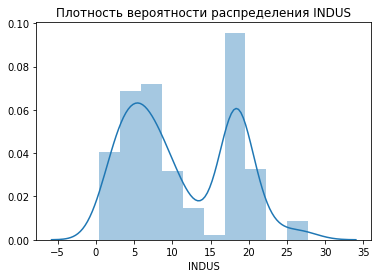

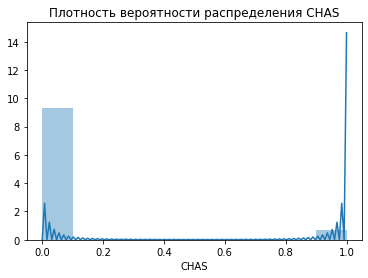

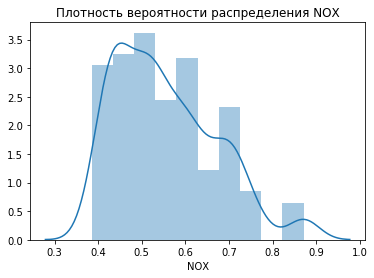

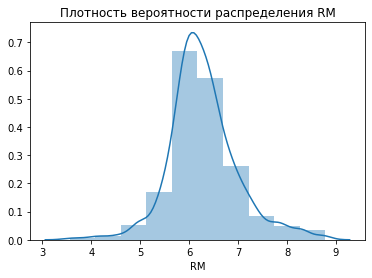

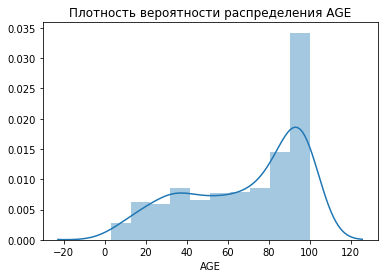

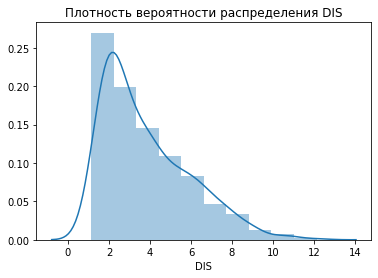

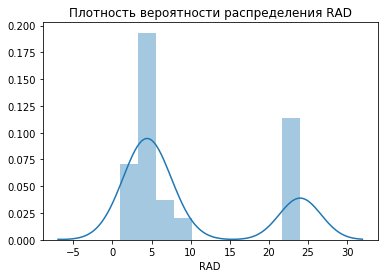

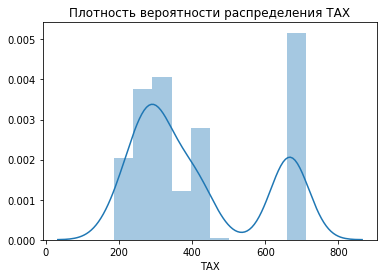

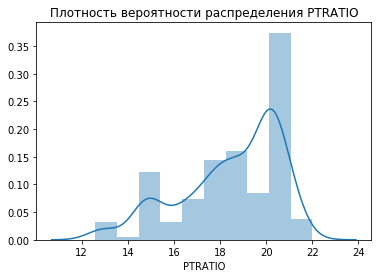

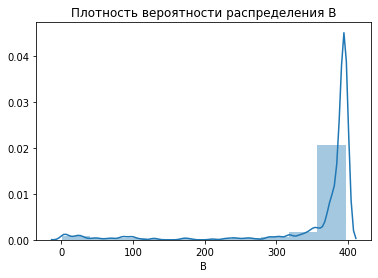

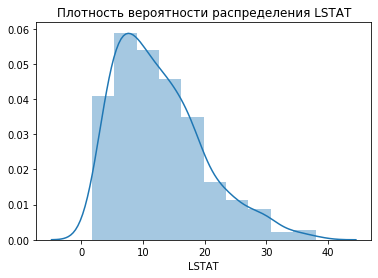

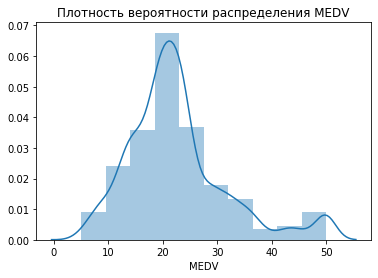

In [11]:
sns.distplot(data['CRIM'], 10)
plt.title('Плотность вероятности распределения CRIM')
plt.show()

sns.distplot(data['ZN'], 10)
plt.title('Плотность вероятности распределения ZN')
plt.show()

sns.distplot(data['INDUS'], 10)
plt.title('Плотность вероятности распределения INDUS')
plt.show()

sns.distplot(data['CHAS'], 10)
plt.title('Плотность вероятности распределения CHAS')
plt.show()

sns.distplot(data['NOX'], 10)
plt.title('Плотность вероятности распределения NOX')
plt.show()

sns.distplot(data['RM'], 10)
plt.title('Плотность вероятности распределения RM')
plt.show()

sns.distplot(data['AGE'], 10)
plt.title('Плотность вероятности распределения AGE')
plt.show()

sns.distplot(data['DIS'], 10)
plt.title('Плотность вероятности распределения DIS')
plt.show()

sns.distplot(data['RAD'], 10)
plt.title('Плотность вероятности распределения RAD')
plt.show()

sns.distplot(data['TAX'], 10)
plt.title('Плотность вероятности распределения TAX')
plt.show()

sns.distplot(data['PTRATIO'], 10)
plt.title('Плотность вероятности распределения PTRATIO')
plt.show()

sns.distplot(data['B'], 10)
plt.title('Плотность вероятности распределения B')
plt.show()

sns.distplot(data['LSTAT'], 10)
plt.title('Плотность вероятности распределения LSTAT')
plt.show()

sns.distplot(data['MEDV'], 10)
plt.title('Плотность вероятности распределения MEDV')
plt.show()

Построить матрицу корреляций для данной таблицы и найти максимально коррелирующий атрибут (несколько) с ценой на дома.

=================================================================

С ценой дома максимально коррелируют количество комнат (RM) - прямая корреляция, и процент людей с низким статусом (LSTAT) - обратная корреляция

In [15]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
CHAS,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
NOX,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
AGE,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
DIS,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
RAD,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
#преобразование в массив и нормализация
MEDV = np.array(data['MEDV']).reshape(-1,1)
LSTAT = np.array(data['LSTAT']).reshape(-1,1)

model = LinearRegression()

In [19]:
#Разделить данные на 80% тренировочных, 20% тестовых
from sklearn.model_selection import train_test_split
# x = LSTAT,
# y = MEDV
X_train, X_test, y_train, y_test = train_test_split(
    LSTAT,
    MEDV,
    test_size = 0.2
)

In [20]:
#обучение модели
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#предсказания модели на тестируемых данных
predicted_y = model.predict(X_test)

In [22]:
#Посчитать ошибку модели на тестовых данных
model.score(X_test, y_test)

0.5751844519455036

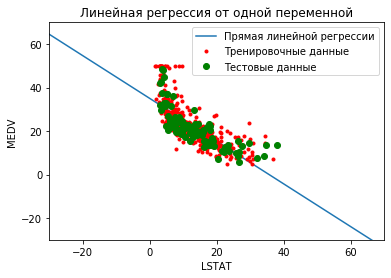

In [28]:
#Сделать точечный график данных и полученной прямой линейной регрессии
# Построим прямую для регрессии
x = np.linspace(-30, 70, 50)
# Посчитаем предсказанные значения
# y = kx + b
# k = model.coef_
# b = model.intercept_
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-30,70)
plt.ylim(-30,70)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Линейная регрессия от одной переменной')
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

=======================================

Между ценой квартиры и процентом людей с более низким уровнем жизни обратная зависимость, что следовало из матрицы корреляций, и является логичным.

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [29]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [30]:
#матрица ковариаций
data.cov()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [32]:
#Сколько в данной таблице отсутствующих значений? - 23
sum(data.isnull().sum())

23

Сколько стран в выборке? Написать ответ. 

In [37]:
len(data['Country (region)'].unique())

156

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [38]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1,0.54,0.49,0.52,0.82,0.55,0.19,0.5,0.81,0.82
SD of Ladder,0.54,1,0.085,0.62,0.6,0.25,0.26,0.39,0.63,0.61
Positive affect,0.49,0.085,1,0.39,0.39,0.68,0.21,0.35,0.3,0.33
Negative affect,0.52,0.62,0.39,1,0.62,0.43,0.16,0.34,0.54,0.49
Social support,0.82,0.6,0.39,0.62,1,0.45,0.12,0.44,0.77,0.74
Freedom,0.55,0.25,0.68,0.43,0.45,1,0.38,0.49,0.41,0.42
Corruption,0.19,0.26,0.21,0.16,0.12,0.38,1,0.27,0.2,0.12
Generosity,0.5,0.39,0.35,0.34,0.44,0.49,0.27,1,0.48,0.43
Log of GDP per capita,0.81,0.63,0.3,0.54,0.77,0.41,0.2,0.48,1,0.85
Healthy life expectancy,0.82,0.61,0.33,0.49,0.74,0.42,0.12,0.43,0.85,1


Между значениями нет обратной корреляций, только прямая. Максимальная корреляция между продолжительностью жизни и ВВП. Коррупция и уровень щедрости особо ни с чем не коррелируют.

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [66]:
data_binom = stats.binom.rvs(n=6,p=0.5,size=10)
data_binom #Биноминальное распределение

array([3, 4, 4, 3, 5, 3, 3, 6, 3, 2])

(1, 6)

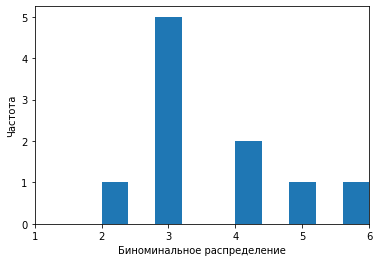

In [72]:
plt.hist(data_binom)
plt.xlabel('Биноминальное распределение')
plt.ylabel('Частота')
plt.xlim(1, 6)

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

Text(0, 0.5, 'Частота')

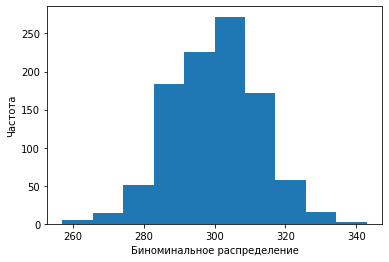

In [76]:
number_of_sums = 1000
X1 = np.zeros([number_of_sums])
for i in range(number_of_sums):
    # суммируем все элементы равномерных выборок
    X1[i] = np.sum(stats.binom.rvs(n=6,p=0.5,size=100))
plt.hist(X1)
plt.xlabel('Биноминальное распределение')
plt.ylabel('Частота')

График изменился, т.к. эксперимент с подбрасываем был смоделирован достаточно большое количество раз, а согласно ЦПТ при многократном повторении эксперимента распределение случайной величины становится близким к нормальному распределению.